# 전처리

In [127]:
# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
# 한글처리 기본적으로 사용
# 윈도우 용
plt.rc("font",family = "Malgun Gothic")
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus']=False

In [128]:
# 모든 데이터 통합
for i in range(99):
    if i == 0:
        first_file_name = "./01_data_원본/포항시_버스_사용자_교통카드_사용_내역/trfcard ({})/trfcard.csv".format(0)
        first_file = pd.read_csv(first_file_name)
    next_file_name =  "./01_data_원본/포항시_버스_사용자_교통카드_사용_내역/trfcard ({})/trfcard.csv".format(i+1)
    next_file = pd.read_csv(next_file_name)
    first_file = pd.concat([first_file, next_file], ignore_index=True)
df = first_file
df

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200327051412,20200327051714,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200327051514,20200327054956,175,문덕-고속터미널-선린병원-달전,일반,N,N,준양주택3차,129.403063,35.960871,오거리,129.366312,36.031816
2,20200327052343,20200327054659,200,양덕-남구청(야구장)-구룡포,일반,N,N,두호동주민센터,129.378910,36.060370,남구보건소,129.396855,35.992624
3,20200327052449,20200327055412,100,문덕-흥해-신광,일반,N,N,천마아파트,129.409928,35.949403,홈플러스,129.364640,36.030950
4,20200327052848,20200327055231,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협세계지점,129.415970,35.967450,죽도시장,129.365169,36.035704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057867,20200122233448,20200122234519,109,양덕-시외터미널-위덕대(유강),일반,Y,N,창포사거리,129.370823,36.061992,삼구4차,129.392204,36.089197
1057868,20200122233905,20200122234736,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,오거리,129.366210,36.031340,문화예술회관,129.365551,36.010599
1057869,20200122233907,20200122234057,131,양덕-송도-시청-양학-양덕,일반,N,N,롯데백화점,129.370250,36.050280,영일대 해수욕장,129.376335,36.054052
1057870,20200122234254,20200122234954,200,양덕-남구청(야구장)-구룡포,일반,N,N,죽도파출소,129.362644,36.028456,롯데아파트,129.377403,36.056943


In [129]:
# 열 이름 변경
df.columns = ["승차시각", "하차시각", "노선명", "노선설명", "승객연령",
                       "환승여부", "추가운임여부", "승차정류장", "승차정류장 GPS X",
                       "승차정류장 GPS Y", "하차정류장", "하차정류장 GPS X", "하차정류장 GPS Y"]
df

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200327051412,20200327051714,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200327051514,20200327054956,175,문덕-고속터미널-선린병원-달전,일반,N,N,준양주택3차,129.403063,35.960871,오거리,129.366312,36.031816
2,20200327052343,20200327054659,200,양덕-남구청(야구장)-구룡포,일반,N,N,두호동주민센터,129.378910,36.060370,남구보건소,129.396855,35.992624
3,20200327052449,20200327055412,100,문덕-흥해-신광,일반,N,N,천마아파트,129.409928,35.949403,홈플러스,129.364640,36.030950
4,20200327052848,20200327055231,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협세계지점,129.415970,35.967450,죽도시장,129.365169,36.035704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057867,20200122233448,20200122234519,109,양덕-시외터미널-위덕대(유강),일반,Y,N,창포사거리,129.370823,36.061992,삼구4차,129.392204,36.089197
1057868,20200122233905,20200122234736,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,오거리,129.366210,36.031340,문화예술회관,129.365551,36.010599
1057869,20200122233907,20200122234057,131,양덕-송도-시청-양학-양덕,일반,N,N,롯데백화점,129.370250,36.050280,영일대 해수욕장,129.376335,36.054052
1057870,20200122234254,20200122234954,200,양덕-남구청(야구장)-구룡포,일반,N,N,죽도파출소,129.362644,36.028456,롯데아파트,129.377403,36.056943


In [130]:
df = df.astype({"승차시각" : "str", "하차시각" : "str"})
df_timesort = df.sort_values(by = "승차시각", ascending=True).reset_index(drop=True)
df_timesort


,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
2,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
3,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
4,20200101051603,20200101053427,175,문덕-고속터미널-선린병원-달전,일반,N,N,국민빌라,129.402976,35.957476,해병대서문,129.413868,35.975902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057867,20200331233806,20200331234546,107,문덕-시외(고속)터미널-흥해,일반,N,N,대동우방아파트,129.360209,36.050494,상대시장,129.361983,36.019438
1057868,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022
1057869,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022
1057870,20200331235643,20200401000408,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,해병대서문,129.413196,35.977037,문덕사거리,129.402914,35.962293


In [131]:
# 결측치 확인
#df_timesort.info()
df_timesort.isnull().sum(0)

승차시각           0
하차시각           0
노선명            0
노선설명           0
승객연령           0
환승여부           0
추가운임여부         0
승차정류장          0
승차정류장 GPS X    0
승차정류장 GPS Y    0
하차정류장          0
하차정류장 GPS X    0
하차정류장 GPS Y    0
dtype: int64

In [132]:
# 중복값 확인
df_timesort.duplicated()

0          False
1           True
2          False
3           True
4          False
           ...  
1057867     True
1057868    False
1057869     True
1057870    False
1057871     True
Length: 1057872, dtype: bool

In [133]:
# 중복데이터 처리 방법 지정 : keep 속성 사용
# first : 첫번째 중복데이터는 살리고(false), 아래나머지 true
# last : 마지막 중복데이터는 살리고(false), 위에 나머지 true
# drop_duplicates() 사용
df_notdup = df_timesort.drop_duplicates(keep="first")
df_notdup

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
2,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
4,20200101051603,20200101053427,175,문덕-고속터미널-선린병원-달전,일반,N,N,국민빌라,129.402976,35.957476,해병대서문,129.413868,35.975902
6,20200101051823,20200101055617,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕마을회관,129.406473,35.952362,육거리,129.366269,36.039589
8,20200101051944,20200101055841,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협,129.402810,35.970003,죽도시장,129.365169,36.035704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057862,20200331231529,20200331232033,109,양덕-우현-시외터미널-유강(위덕대)-자명-양덕,일반,N,N,법원사거리,129.387740,36.089380,농협하나로클럽,129.398558,36.081653
1057864,20200331231651,20200331232054,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,LG빌라입구,129.317277,36.027317,대잠중앙하이츠,129.338901,36.021808
1057866,20200331233806,20200331234546,107,문덕-시외(고속)터미널-흥해,일반,N,N,대동우방아파트,129.360209,36.050494,상대시장,129.361983,36.019438
1057868,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022


In [134]:
# 다시 중복값 확인
df_notdup.duplicated().sum(0)

0

# 시간대별 버스 이용량 분석

In [135]:
# 분석에 필요한 열 추출
df_1 = df[["승차시각", "승객연령"]].reset_index(drop=True)
df_1

,승차시각,승객연령
0,20200327051412,일반
1,20200327051514,일반
2,20200327052343,일반
3,20200327052449,일반
4,20200327052848,일반
...,...,...
1057867,20200122233448,일반
1057868,20200122233905,일반
1057869,20200122233907,일반
1057870,20200122234254,일반


In [136]:
# 시각을 다 추출해 열로 생성
date = df_1["승차시각"]
month = []
day =[]
hour = []
minute = []
second = []
for i in range(len(date)):
    month.append(date[i][4:6])
    day.append(date[i][6:8])
    hour.append(date[i][8:10])
    minute.append(date[i][10:12])
    second.append(date[i][12:14])
df_1["월"] = month
df_1["일"] = day
df_1["시"] = hour
df_1["분"] = minute
df_1["초"] = second
df_1

,승차시각,승객연령,월,일,시,분,초
0,20200327051412,일반,03,27,05,14,12
1,20200327051514,일반,03,27,05,15,14
2,20200327052343,일반,03,27,05,23,43
3,20200327052449,일반,03,27,05,24,49
4,20200327052848,일반,03,27,05,28,48
...,...,...,...,...,...,...,...
1057867,20200122233448,일반,01,22,23,34,48
1057868,20200122233905,일반,01,22,23,39,05
1057869,20200122233907,일반,01,22,23,39,07
1057870,20200122234254,일반,01,22,23,42,54


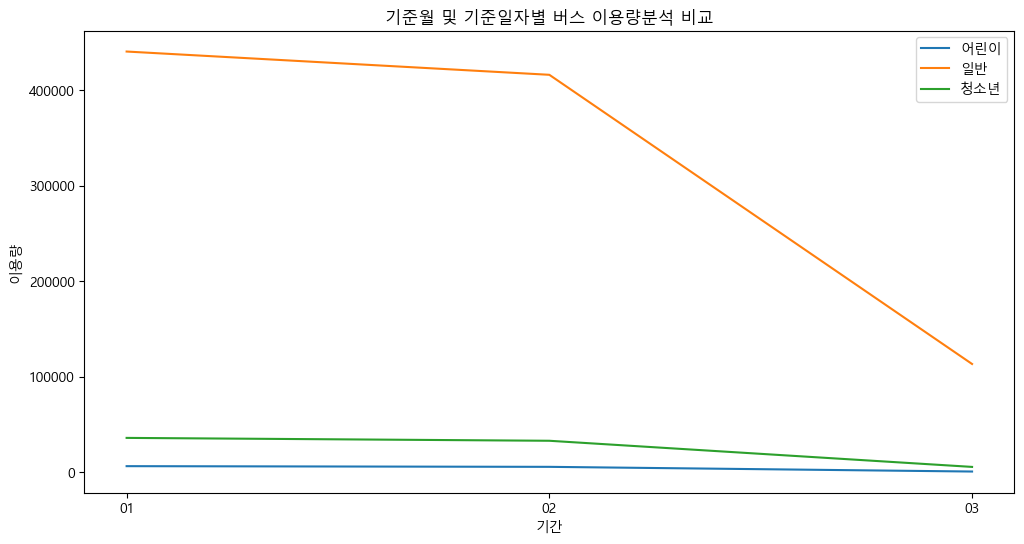

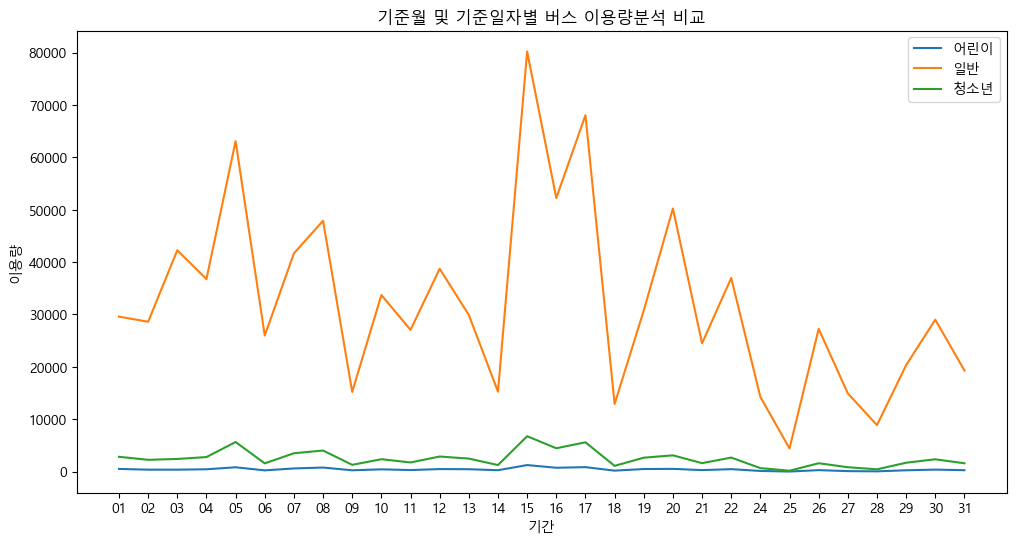

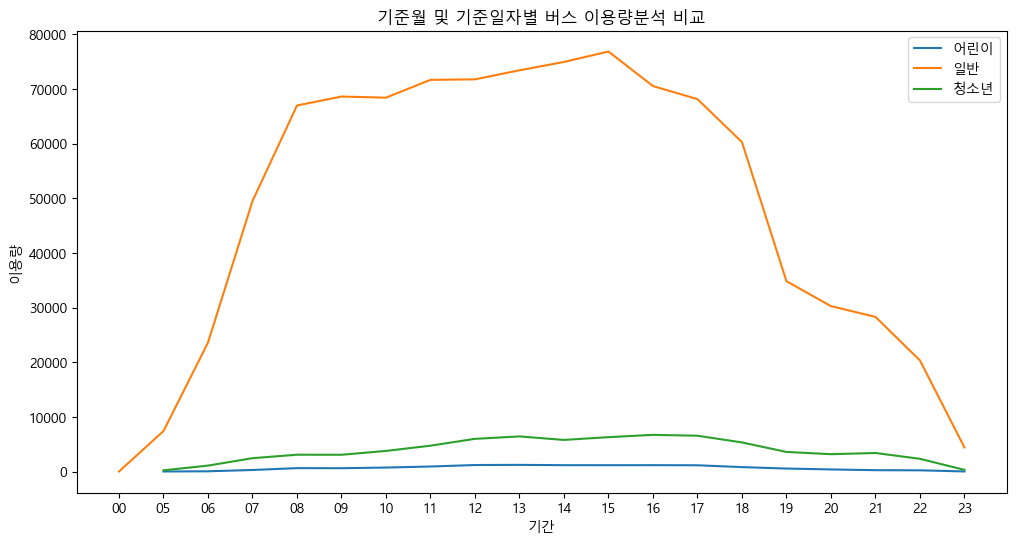

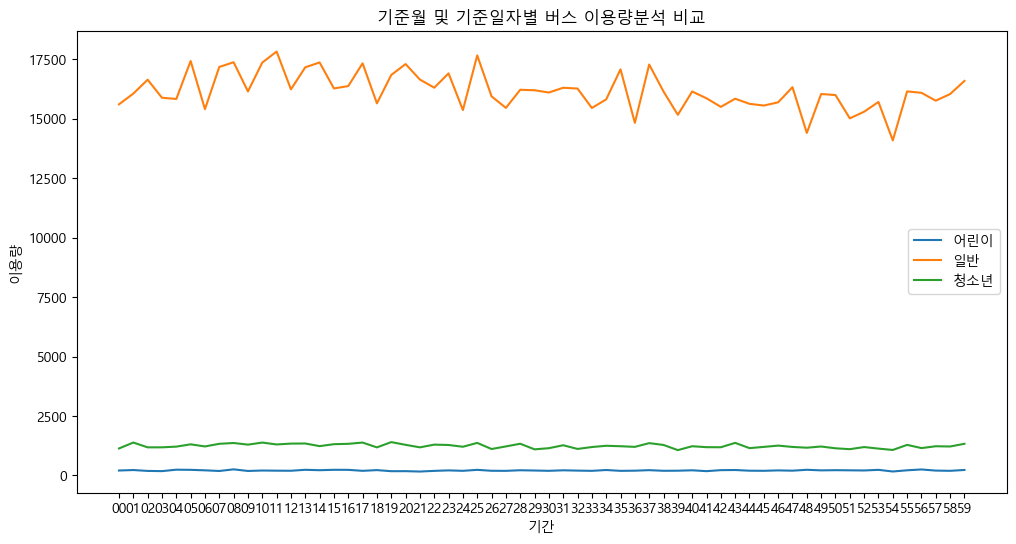

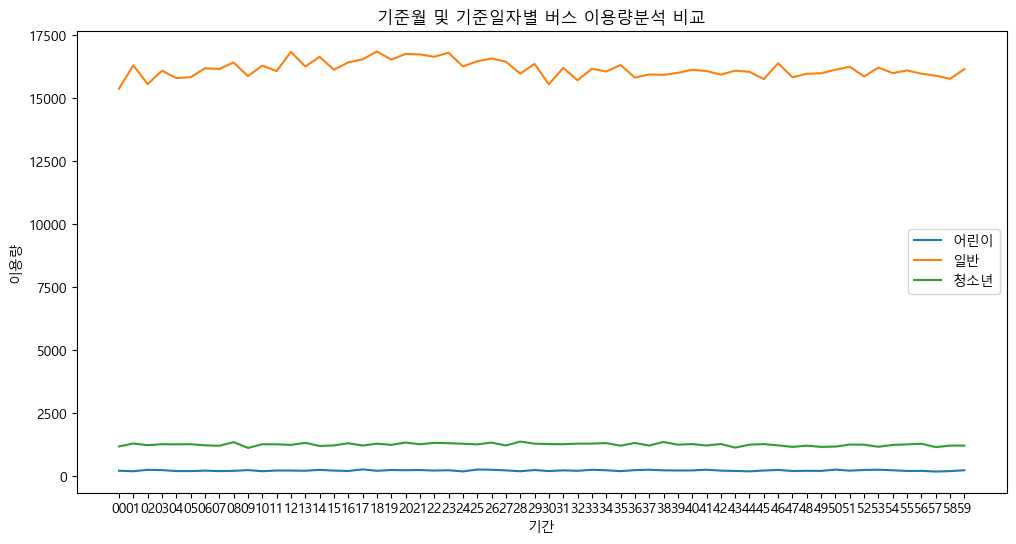

In [137]:
# 피벗테이블을 이용해 시간 별 이용량 분석
for i in df_1.columns[2:]:
    # 분석할 데이터 프레임
    df_2 = df_1.pivot_table(values = "승차시각",columns="승객연령",index=i,aggfunc="count").reset_index()
    # 그래프 그리기
    plt.figure(figsize = (12,6))
    plt.plot(df_2[i], df_2["어린이"], label="어린이")
    plt.plot(df_2[i], df_2["일반"], label="일반")
    plt.plot(df_2[i], df_2["청소년"], label="청소년")
    plt.xlabel("기간")
    plt.ylabel("이용량")
    plt.title("기준월 및 기준일자별 버스 이용량분석 비교")
    # plt.xticks(["20200101","20200121","20200211",
    #                 "20200228","20200321"])
    plt.legend()

    plt.show()
    


# 버스 내 체류시간 분석

In [144]:
# 분석에 필요한 열 추출
df_3 = df[["승차시각", "하차시각", "승객연령"]].reset_index(drop=True)
df_3

,승차시각,하차시각,승객연령
0,20200327051412,20200327051714,일반
1,20200327051514,20200327054956,일반
2,20200327052343,20200327054659,일반
3,20200327052449,20200327055412,일반
4,20200327052848,20200327055231,일반
...,...,...,...
1057867,20200122233448,20200122234519,일반
1057868,20200122233905,20200122234736,일반
1057869,20200122233907,20200122234057,일반
1057870,20200122234254,20200122234954,일반


In [148]:
# 체류시간 컬럼 추가
df_3[["승차시각","하차시각"]]

# 승.하차 시각을 시,분,초 추출해 열로 생성
date1 = df_3["승차시각"]
date2 = df_3["하차시각"]
time1 = []
time2 = []
for i in range(2):
    time = []
    for i in range(len(df_3)):
        time.append(date[i][9:])
    df_3


,승차시각,하차시각
0,20200327051412,20200327051714
1,20200327051514,20200327054956
2,20200327052343,20200327054659
3,20200327052449,20200327055412
4,20200327052848,20200327055231
...,...,...
1057867,20200122233448,20200122234519
1057868,20200122233905,20200122234736
1057869,20200122233907,20200122234057
1057870,20200122234254,20200122234954


1057872